In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import sklearn.metrics


In [4]:
def grab(which, values=1):

#     which = 'bars'
    # values = 2

    RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/CP_USERSTUDY/RESULTS/'
    
    results = [None]*13

    with open(RESULTS_DIR + which + '.csv', 'r') as f:
        lines = f.readlines()

    rej_cnt = 0
    for l in lines[1:]:
        if l.find('Rejected') != -1:
            rej_cnt += 1
            continue
        l_split = l.strip("\r\n").split(',')
#         print l_split
#         print l_split[-1-values]
        stimuli = int(l_split[-1 - values].split('/')[-1].split('.')[0])
        answer = [int(l_split[-1 -x].strip('\r\n').strip('"')) for x in range(values)]
        answer.reverse()

        if not results[stimuli]:
            results[stimuli] = []
        results[stimuli].append(answer)
    #         print stimuli, answer

#     print 'Rejected', rej_cnt
    
    return results

def merge(a1, a2):
    
    results = []
    for i,a in enumerate(a1):
        
         results.append(a1[i]+a2[i])
            
    assert len(results) == 13

    return results

def grabbygrab(which, values=1, GT_DIR='/n/regal/pfister_lab/PERCEPTION/CP_USERSTUDY/Figure1/', give_results=False):
    
    merged = merge(grab(which, values), grab(which+'2', values))
#     print merged
    if which == 'bars' or which == 'framed':
        gt_file = GT_DIR  + '/labels.p' 
    else:
        gt_file = GT_DIR + which + '/labels.p' 
    with open(gt_file, 'r') as f:
        labels = pickle.load(f)
        
#     print labels
    labels = np.array(labels).astype(np.float)
    
#     if values == 1:
    max_label = labels.max()
    min_label = labels.min()
#     print min_label, max_label
#     elif values == 2:
#         max_label1 = max(labels)
        
    if which=='bars' or which=='framed':
        labels == labels.ravel()
#         min_label = 0
        

    no_users = len(merged[0])
    user_results = []
    for u in range(no_users):
        
        # grab samples for this user
        samples = []
        for stimuli in merged[3:]:
            
            user_val = stimuli[u]
            
            samples.append(user_val)
            
        if values == 1:
            user_results.append(np.array(samples).astype(np.float).ravel())
        elif values == 2:
            user_results.append(np.array(samples).astype(np.float))
        
    #
    # now normalize our samples
    #
    

    if give_results:
        return user_results
    
    
    max_labels = {
        'position_common_scale': [0,60],
        'position_non_aligned_scale': [0,60],
        'length': [1, 60],
        'direction': [0,359],
        'angle': [1,90],
        'area': [3.1415, 5026.4],
        'volume': [1, 8000],
        'curvature': [0,.3],
        'shading': [0,100],
        'bars': [1,60],
        'framed': [1,60],
        'weber10': [1,10],
        'weber100': [1,10],
        'weber1000': [1,10]
    }
    
    min_label = max_labels[which][0]
    max_label = max_labels[which][1]
    
#     min_label = 0
#     max_label = 100
    for u in range(no_users):
        
        
        user_results[u] -= min_label
        user_results[u] /= (max_label - min_label)
        
    # also normalize the labels
    labels -= min_label
    labels /= (max_label - min_label)


        
    
    #
    # now calculate MLAE
    #
    MLAES = []
    AES = []
    for u in range(no_users):
        
        if which == 'curvature':
            user_results[u] /= 100
        
#         MLAE = sklearn.metrics.mean_absolute_error(user_results[u], labels)#np.log2(sklearn.metrics.mean_absolute_error(user_results[u]/100.*100, labels*100)+.125)
        MLAE = np.log2(sklearn.metrics.mean_absolute_error(user_results[u]*100, labels[3:]*100)+.125)
        MLAES.append(MLAE)
        AE = sklearn.metrics.mean_absolute_error(user_results[u]*100, labels[3:]*100)
        AES.append(AE)

#     print labels[0:5], user_results[0][0:5]
    
        
    return MLAES, AES
#     print labels, min(labels), max(labels)

In [41]:
which = ['bars', 'framed']


u_results = []

for w in which:
    res = grabbygrab(w,values=2, GT_DIR='/n/regal/pfister_lab/PERCEPTION/CP_USERSTUDY/Figure12/', give_results=True)
    diffs_for_all_u = []
    for u in res:
        # loop through users
         
        # only store difference between the two
        diffs = []
        for t in u:
            diffs.append(int(np.abs(t[0]-t[1])))
        diffs_for_all_u.append(diffs)
        
    u_results.append(diffs_for_all_u)



/n/home05/haehn/.conda/envs/CP/lib/python2.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [42]:
len(u_results)

2

In [44]:
np.array(u_results[1])

array([[15,  3,  5,  3, 10,  2,  5,  2,  5,  1],
       [16, 45, 12,  5,  5,  2, 15, 10, 16, 10],
       [10, 20, 20, 10,  3, 10,  5, 10,  0,  5],
       [12, 10, 13,  0,  0, 56, 20,  0,  2,  0],
       [11,  4, 20,  5,  3,  2,  8,  2, 10,  1],
       [ 0,  4, 20,  2, 10,  2, 10, 28, 10,  0],
       [ 4, 10, 43, 10, 10, 10, 15, 15, 25,  5],
       [ 3, 20, 20,  1,  5, 10,  0, 15, 10,  1],
       [10, 20,  5,  5, 15, 10,  0, 50, 10,  5],
       [10, 10, 10, 10,  5, 10,  9, 20,  8,  5],
       [12,  8, 13,  4,  2,  2,  9,  9, 17,  1],
       [ 3,  1, 11,  2, 10,  2,  6, 10,  3,  1],
       [ 7,  8, 10,  1,  8,  1,  4,  6, 10,  2],
       [ 6,  6,  7,  2,  7,  1,  5, 10, 13,  1],
       [ 4,  5, 10,  2,  3,  3,  5,  5,  2,  1],
       [ 4,  5, 13,  3,  3,  2,  3,  4,  8,  3],
       [10, 12,  4,  2,  6,  1,  7,  4,  4,  4],
       [ 2,  2,  3, 10,  3,  3,  7, 10,  2,  2],
       [10,  0, 10,  1,  5,  5,  5,  7,  4,  2],
       [ 7,  0, 49,  1,  2, 10, 15,  3,  8,  1],
       [ 8,  5, 14, 

In [35]:
for u in u_results[0]:
    

array([[ 13.,  12.],
       [  8.,  50.],
       [  5.,  12.],
       [  6.,   4.],
       [  5.,  10.],
       [  2.,   2.],
       [ 12.,  22.],
       [ 50.,  42.],
       [ 10.,   1.],
       [ 18.,   9.]])

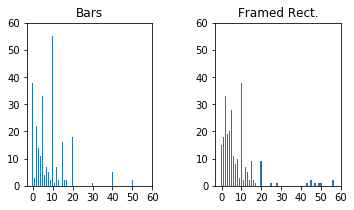

In [50]:
import matplotlib.gridspec as gridspec
plt.figure(figsize(9,3))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.5)


for i,w in enumerate(['Bars', 'Framed Rect.']):
    ax1 = plt.subplot(gs[0, i], )

    unique, counts = numpy.unique(u_results[i], return_counts=True)
    plt.bar(unique, counts) # remove rejects > 10
    plt.xticks(range(0,61,10))
    plt.ylim(0,60)
    plt.title(w)
    
plt.savefig('../PAPER/gfx/figure12_hist.pdf')

In [29]:
unique, counts

(array([  1.,   2.,   4.,   5.,   6.,   8.,   9.,  10.,  12.,  13.,  18.,
         22.,  42.,  50.]), array([1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2]))